In [1]:
import numpy as np
import matplotlib.pyplot as mp
import sklearn.tree as st
import sklearn.datasets as sd  # sklearn提供的数据集
import sklearn.utils as su  # 可以把数据集按照行进行打乱
import sklearn.metrics as sm
import sklearn.ensemble as se

In [21]:
import pandas as pd
dataset = pd.read_csv('1.csv',usecols=[0])


tmp_dataset=dataset
time111=10
for i in range(1,time111+1):
    result=tmp_dataset.shift(periods=i)
    dataset=pd.concat([dataset,result],axis=1)

In [3]:
dataset

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,...,20.2,20.5,17.3,16.2,13.2,13.3,12.7,14.7,14.7,8.8
3648,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,...,19.4,20.2,20.5,17.3,16.2,13.2,13.3,12.7,14.7,14.7
3649,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,...,15.5,19.4,20.2,20.5,17.3,16.2,13.2,13.3,12.7,14.7
3650,15.7,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,...,14.1,15.5,19.4,20.2,20.5,17.3,16.2,13.2,13.3,12.7


In [22]:
# Create the features (x) and target (y) data sets
train=dataset[time111:round((dataset.shape[0]-time111)*0.9)]
test=dataset[round((dataset.shape[0]-time111)*0.9):]

# import sklearn machine learning library
from sklearn.model_selection import train_test_split

# Split the features and target datasets into training and test datasets
X_train = train.iloc[:, : -1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, : -1].values
y_test = test.iloc[:, -1].values

In [23]:
import time
time1=time.time()
model = st.DecisionTreeRegressor(max_depth=300)
model.fit(X_train, y_train)
pred_test_y = model.predict(X_test)
time2=time.time()

In [24]:
dt_fi = model.feature_importances_
print(dt_fi)
print(time2-time1)

[0.03961252 0.04335426 0.03595735 0.04765312 0.03251207 0.03913856
 0.05774549 0.0385938  0.04374265 0.62169017]
0.024981021881103516


In [25]:
print(sm.r2_score(y_test, pred_test_y))
print('=======================')

0.2561281596412919


In [26]:
import matplotlib.pyplot as plt
xx=[]
for i in range(round(pred_test_y.shape[0]/10)):
    xx.append(i)

In [29]:

data={'y_test':pred_test_y}
frame=pd.DataFrame(data)
frame.to_csv('tmp_dt.csv')

In [27]:
print(pred_test_y)

[17.2 12.8 12.6  9.9 16.4 10.5 15.4  9.4 12.8 14.8  8.5 14.5 15.2 13.7
 14.6 15.  16.  12.5 17.6 14.2 15.6 13.5 14.6 14.1 10.  14.2 18.5 17.
 20.7 14.4 14.5 11.2 16.8 13.2 12.5 16.3 16.5 15.2 13.6 16.5 14.2 22.1
 11.  15.6 15.6 13.7  8.8 11.4 16.6 13.7 13.2 12.8 15.2 14.9 14.9 12.4
 16.2 14.2 18.6 20.5 16.8 14.2 12.8 22.5 19.  15.7 11.8 15.1 14.5 15.6
 22.4 15.7 13.6 13.2 22.5 15.6 17.5 18.  15.2 17.9 13.6 21.4 18.2 15.
 11.  13.9 16.2 16.4 15.1  5.4 10.1 16.2 13.7 15.4 15.1 16.1 11.  13.2
 15.7 13.8 18.4 12.  13.8 14.4 16.8 10.5 11.6 12.5 14.4 15.2 11.6 12.5
 15.  22.7 18.2 14.1 17.5 14.2 17.  17.4 16.6 18.7  9.7 12.7  9.5 18.
  7.6  6.3 18.7 13.  14.1 16.1 11.  11.8 13.2 12.4  7.4 12.9  7.6 11.9
  9.4  5.3  9.6  9.  10.8  9.8  6.8 10.7 12.4 13.2 14.9 13.9 10.6  7.4
  8.1  5.8  5.5  8.9 10.   5.8 11.6  8.6  9.5 11.5  8.   8.2  6.6  5.4
  8.9  7.1  8.5 12.4  8.2  9.4  8.8  2.2  9.2 10.6 10.2  8.9  3.8  9.
  7.8  8.2  8.   7.3  8.6  7.1  6.7  9.7  4.4 10.2  9.2  7.2  3.1  6.6
  4.8  4. 

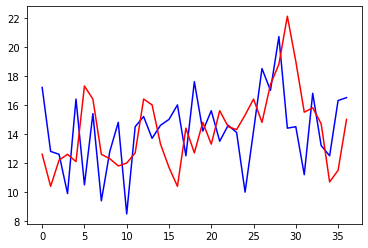

In [28]:
plt.plot(xx, pred_test_y[:len(xx)],c='b')
plt.plot(xx, y_test[:len(xx)],c='r')

In [12]:
from sklearn import metrics

print(np.sum((y_test-pred_test_y)**2))
print(metrics.mean_absolute_error(y_test,pred_test_y))
print(metrics.r2_score(y_test,pred_test_y))


4446.0
2.686224489795918
0.20829914033985597
